In [91]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
from IPython.core.display import display, HTML
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 1
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

display(HTML("<style>.container { width:100% !important; }</style>"))

In [92]:
import os
import seaborn as sns
sns.set(font_scale=2, style="whitegrid")
import pandas as pd
import math

from Utils.UtilsViz import *
from Utils.DataUtils import *

In [93]:
US_coord = [37.0902, -102]
NY_COORD = [40.7128, -74.0060]

# ny_data_path = os.getcwd()
ny_datapath = "C:\\Users\\sriharis\\OneDrive\\UChicago\\DataMining\\project\\NYData\\"
# ny_datapath = "C:\\Users\\Ssrih\\OneDrive\\UChicago\\DataMining\\project\\NYData\\"

In [94]:
listings = pd.read_csv(os.path.join(ny_datapath, "listings.csv"))
# print(os.getcwd())
# ny_datapath = os.path.join(os.getcwd(), "../data/listings_no_nlp.csv")
# listings = pd.read_csv(ny_datapath)
# listings = pd.read_csv(ny_datapath, index_col="Unnamed: 0")

In [95]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2454,https://www.airbnb.com/rooms/2454,20190201155637,2019-02-01,superCondo,"Great light, exposed brick and 10 feet high ce...","A fully renovated, West Elm furnished Condo, w...","Great light, exposed brick and 10 feet high ce...",none,Turtle bay neighborhood in the heart of midtow...,NaN,"4,5,6, trains 3 minutes away walking distance",NaN,available,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/4643/708f9...,NaN,2688,https://www.airbnb.com/users/show/2688,Ben,2008-09-03,US,NaN,within a day,60%,NaN,f,https://a0.muscache.com/im/pictures/user/ad93f...,https://a0.muscache.com/im/pictures/user/ad93f...,Midtown East,1.0,1.0,"['email', 'phone']",t,f,"New York, NY, United States",Midtown East,Midtown,Manhattan,New York,NY,10022,New York,"New York, NY",US,United States,40.755523,-73.967679,t,Condominium,Entire home/apt,2,1.0,0.0,2.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",NaN,$137.00,NaN,NaN,NaN,NaN,1,$0.00,7,730,7,7,730,730,7.0,730.0,2 days ago,t,16,36,65,65,2019-02-01,1,1,2019-01-30,2019-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,1,0,0,1.00
1,2539,https://www.airbnb.com/rooms/2539,20190201155637,2019-02-02,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,If this room is unavailable on your desired da...,Very close to F and G trains and Express bus i...,NaN,NaN,-The security and comfort of all our guests is...,NaN,NaN,https://a0.muscache.com/im/pictures/3949d073-a...,NaN,2787,https://www.airbnb.com/users/show/2787,John,2008-09-07,"New York, New York, United States",Educated professional living in Brooklyn. I l...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/8674565a-7...,https://a0.muscache.com/im/pictures/8674565a-7...,Gravesend,8.0,8.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn , NY, United States",Kensington,Kensington,Brooklyn,Brooklyn,NY,11218,New York,"Brooklyn , NY",US,United States,40.647486,-73.972370,f,Apartment,Private room,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",NaN,$149.00,$299.00,$999.00,$100.00,$25.00,1,$25.00,1,730,1,1,730,73

# Price preprocessing 

In [11]:
listings['price'] = listings['price'].str.strip('').str.strip('$').str.replace(',', '').astype('float')

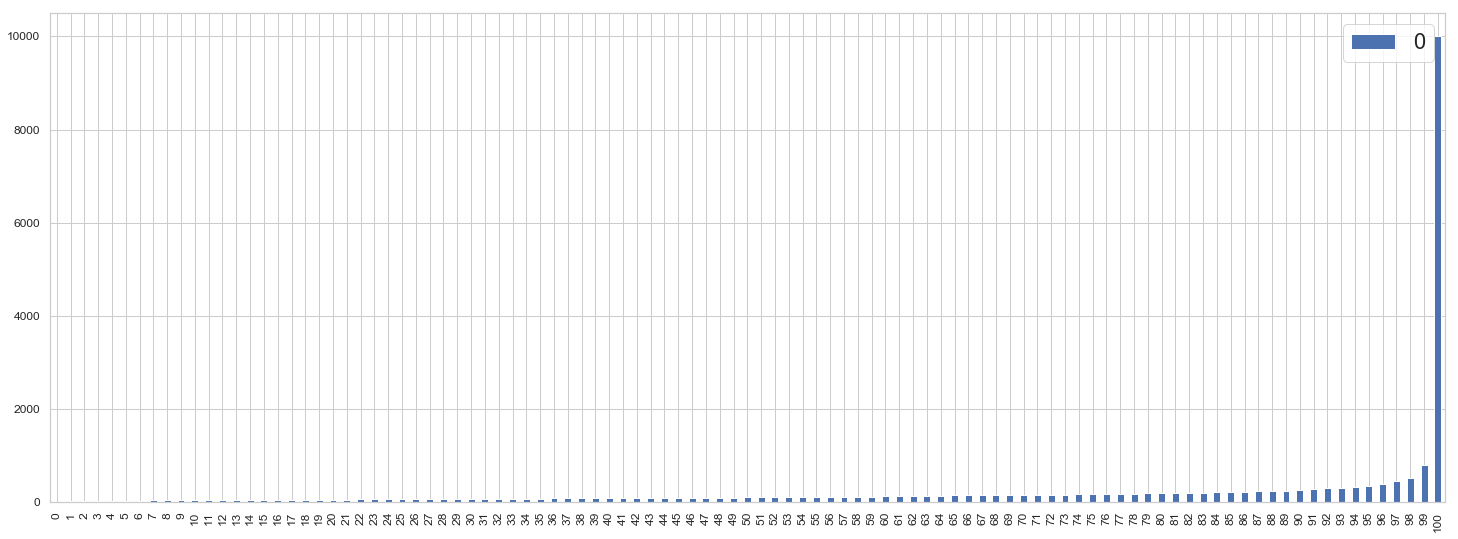

In [12]:
percentiles = list(range(0,101))
price_percentile = {}
for p in percentiles:
    price_percentile[p] = np.percentile(listings['price'].values, p)

price_percentile = pd.DataFrame.from_dict(price_percentile, orient='index')
g = price_percentile.plot(kind='bar', figsize=(25,9), grid=True)
t = g.tick_params(labelsize=12)


In [13]:
listings = listings[listings["price"] <= price_percentile.iloc[99,:].values[0]]
listings = listings[listings["price"] >= price_percentile.iloc[1,:].values[0]]
listings["price"].describe()

count    49251.000000
mean       137.606262
std        101.958580
min         30.000000
25%         70.000000
50%        108.000000
75%        175.000000
max        799.000000
Name: price, dtype: float64

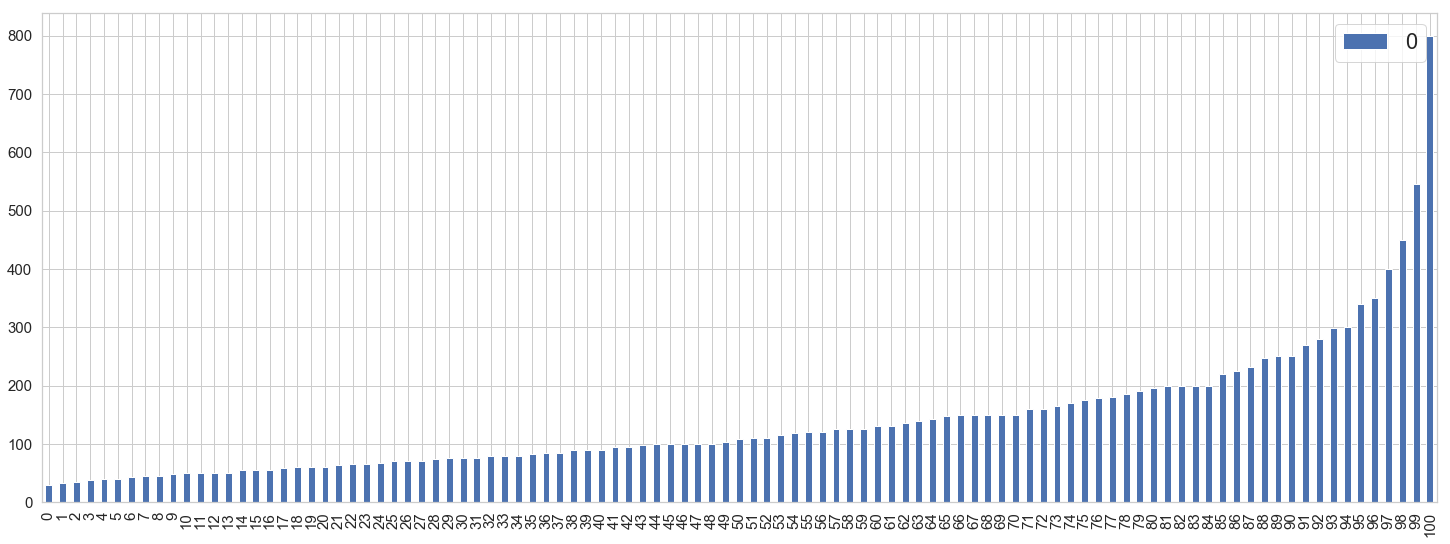

In [14]:
percentiles = list(range(0,101))
price_percentile = {}
for p in percentiles:
    price_percentile[p] = np.percentile(listings['price'].values, p)

price_percentile = pd.DataFrame.from_dict(price_percentile, orient='index')
g = price_percentile.plot(kind='bar', figsize=(25,9), grid=True)
t = g.tick_params(labelsize=15)


No handles with labels found to put in legend.


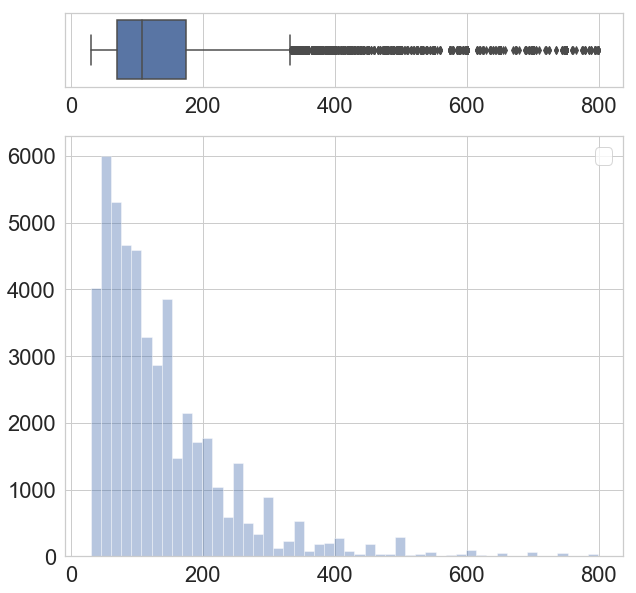

In [15]:
plot_dist(data=listings, colname="price", kde=False)

No handles with labels found to put in legend.


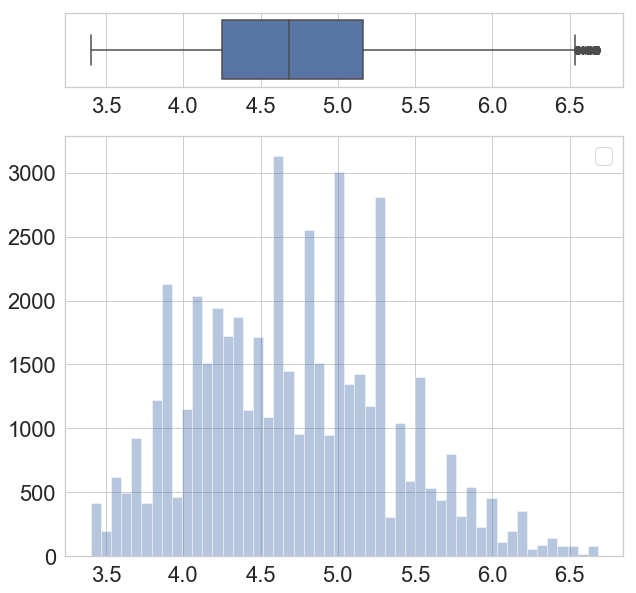

In [16]:
def get_logprice(price):
    if price <= 0.0:
        return 0.0
    else:
        return np.log(price)
listings['price_log'] = listings['price'].apply(get_logprice)
plot_dist(data=listings, colname="price_log", kde=False)

In [17]:
listings.drop("price_log", axis=1, inplace=True)

# Host response rate 

In [ ]:
def get_hrr_fillval(listings):
    non_null = listings['host_response_rate'].dropna(axis=0)
    fv = non_null.str.strip('%').astype('int').median()
    return fv
listings['host_response_rate'] = listings['host_response_rate'].fillna(str(int(get_hrr_fillval(listings))))
listings['host_response_rate'] = listings['host_response_rate'].str.strip('%').astype('int')

In [50]:
def roundto(row, base=5):
    return int(base * round(float(row) / base))
listings["price_rounded"] = listings["price"].apply(roundto)

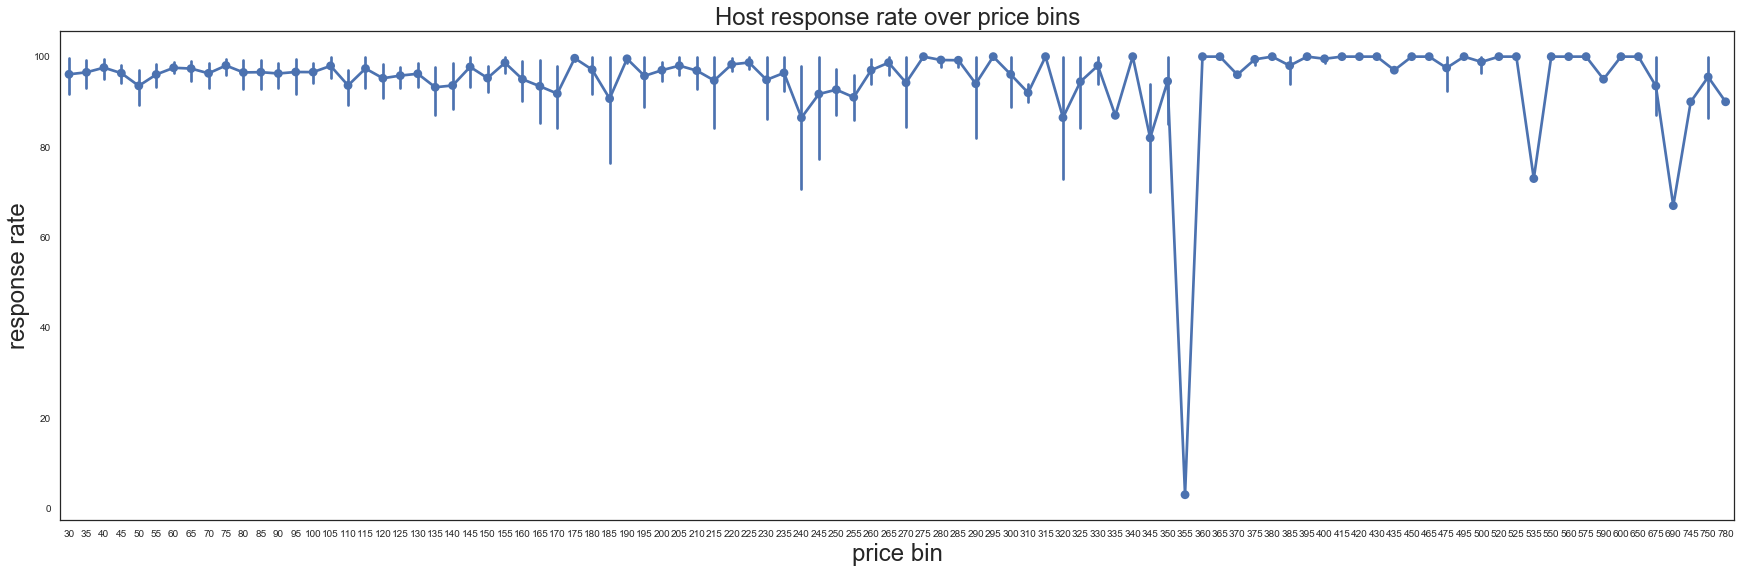

In [88]:
f, ax = plt.subplots(1,1,figsize=(30,9))
g = sns.pointplot(x=listings["price_rounded"].values[::20], y=listings["host_response_rate"].values[::20], ax=ax)
t = g.set(title="Host response rate over price bins", ylabel="response rate", xlabel="price bin")
t = g.tick_params(labelsize=10)

In [21]:
listings.drop("price_rounded", axis=1, inplace=True)

# Host count of listings 

In [ ]:
listings["host_listings_count"]

In [90]:
tmp = listings[["host_id", "host_listings_count"]].groupby("host_id", as_index=False).count()
tmp.head()

,host_id,host_listings_count
0,2571,1
1,2688,1
2,2787,8
3,2845,2
4,2881,2


# Amenities

Let's have a look at the distribution of amenities

No handles with labels found to put in legend.


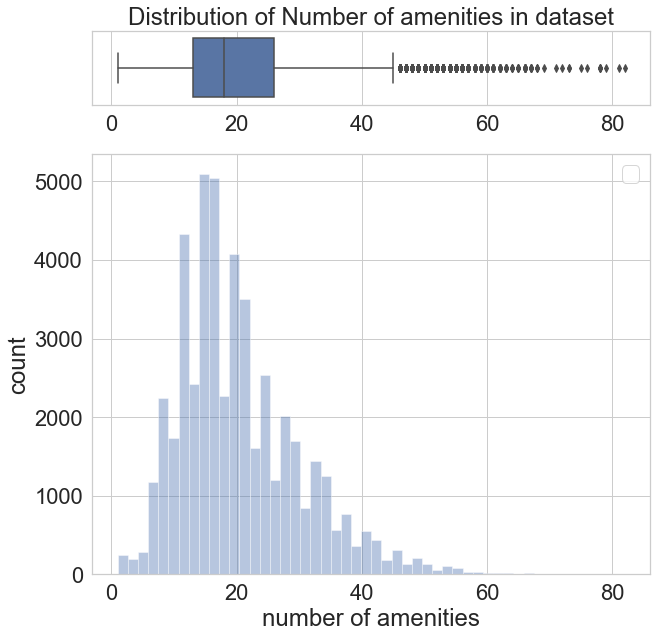

In [22]:
# Amenities
def get_num_amenities(row):
    a = row[1:-1].split(",")
    return len(a)

listings["num_amenities"] = listings["amenities"].apply(get_num_amenities)
g = plot_dist(data=listings, colname="num_amenities", xlabel="number of amenities", ylabel="count", kde=False, title="Distribution of Number of amenities in dataset")

How does price behave based on number of amenities?

Let's filter out all the prices above 500$

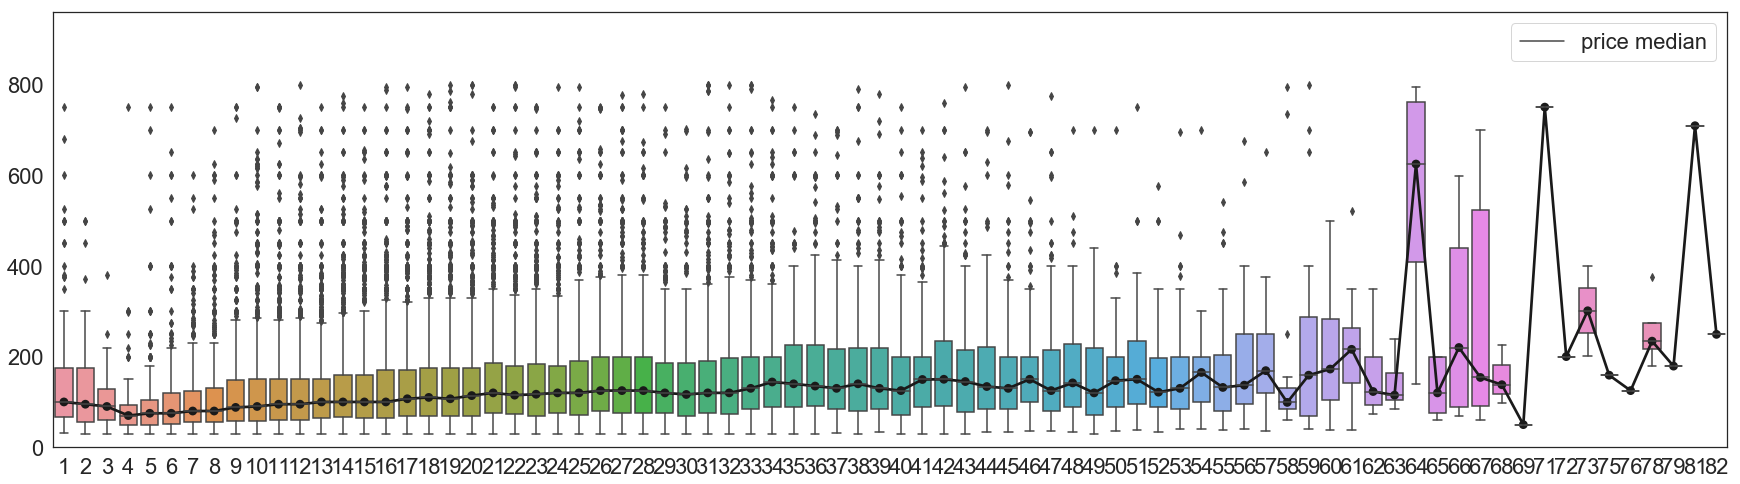

In [53]:
f, ax = plt.subplots(1,1,figsize=(30, 8))
g = plot_box(x="num_amenities", y="price", data=listings, ax=ax, agg_rule="median")

Let's group price into bins and see how behaviour is

In [24]:
bins = list(range(0,90, 10))
listings['amenities_binned'] = pd.cut(listings['num_amenities'], bins)

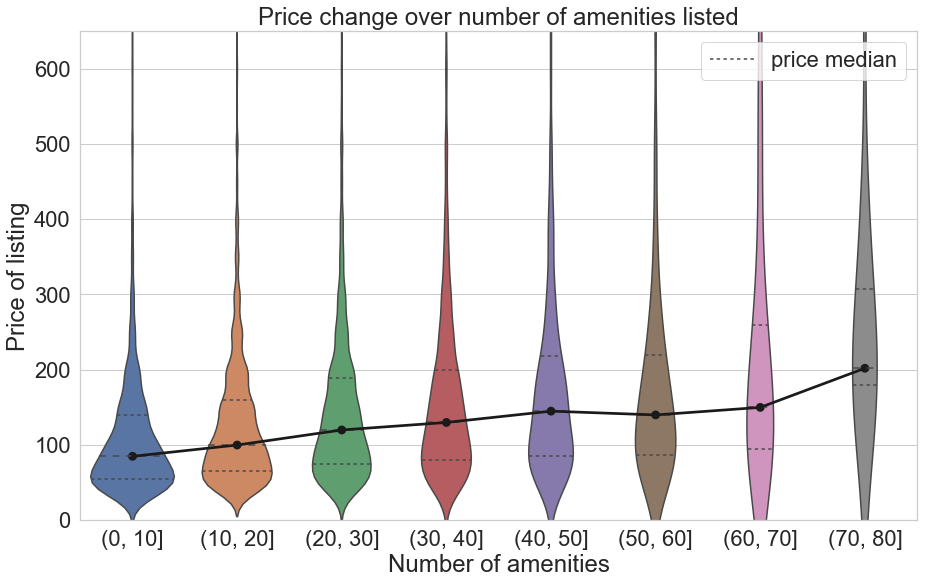

In [25]:
f, ax = plt.subplots(1,1,figsize=(15, 9))
g = plot_violin(x="amenities_binned", y="price", data=listings, ax=ax, agg_rule="median",
            title="Price change over number of amenities listed",
            xlabel="Number of amenities", ylabel="Price of listing", ylim=650)

# Accommodates 

Does the price vary significantly as accommodation increases?

In [26]:
def group_accommodates(row):
    if row < 10:
        return str(int(row))
    elif row >= 10:
        return "10+"
    else:
        return row
    
listings["acc_group"] = listings["accommodates"].apply(group_accommodates)
# listings[["bedrooms", "bedroom_group"]]

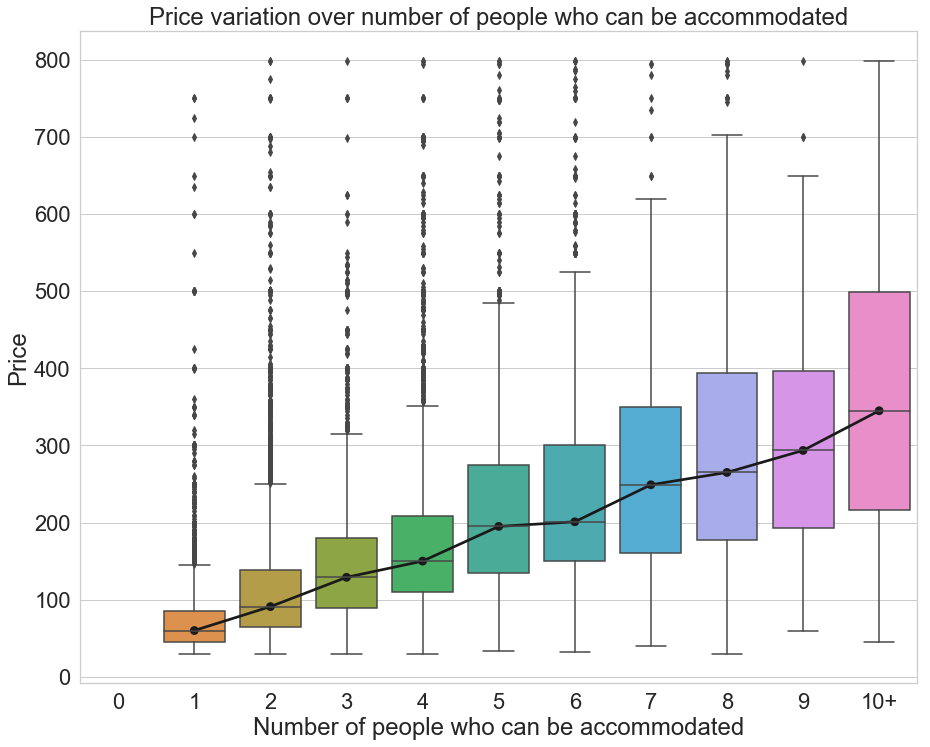

In [27]:
# f, ax = plt.subplots(1,1,figsize=(15, 12))
# g = plot_box(x="accommodates", y="price", data=listings, ax=ax, agg_rule="median", title="Price variation over number of people accommodated", xlabel="accommodates", ylabel="price")

f, ax = plt.subplots(1,1,figsize=(15, 12))

listings['acc_group'] = pd.Categorical(
    listings['acc_group'], 
    categories=['0','1','2','3','4','5','6', '7', '8', '9', '10+'], 
    ordered=True
)
listings.sort_values(by="acc_group", inplace=True)

g = sns.boxplot(x="acc_group", y="price", data=listings, ax=ax)

agg_data = listings[["price", "acc_group"]].groupby(by=["acc_group"], as_index=False).median()
g = sns.pointplot(x="acc_group", y="price", data=agg_data, ax=ax, color="k")
t = g.set(title="Price variation over number of people who can be accommodated", xlabel="Number of people who can be accommodated", ylabel="Price")


#  Bathrooms, Bedrooms and Beds

Manhattan is definitely the most expensive.

In [28]:
cols = ["bathrooms", "bedrooms", "beds"]
listings[cols].describe()

,bathrooms,bedrooms,beds
count,49185.000000,49208.000000,49210.000000
mean,1.135814,1.173529,1.536862
std,0.404808,0.737600,1.059946
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000
max,7.500000,11.000000,21.000000


Bathrooms and bedrooms may not add as much value to the dataset when over 75% of the column is just 1. 

Beds can be filled with the median, 1.0

# Security Deposit

In [29]:
listings['security_deposit'] = listings['security_deposit'].dropna(axis=0).str.strip('$').str.replace(',', '').astype('float')

In [30]:
tmp = listings[["price", "security_deposit"]]
tmp = tmp.dropna()
tmp.corr()

,price,security_deposit
price,1.000000,0.245089
security_deposit,0.245089,1.000000


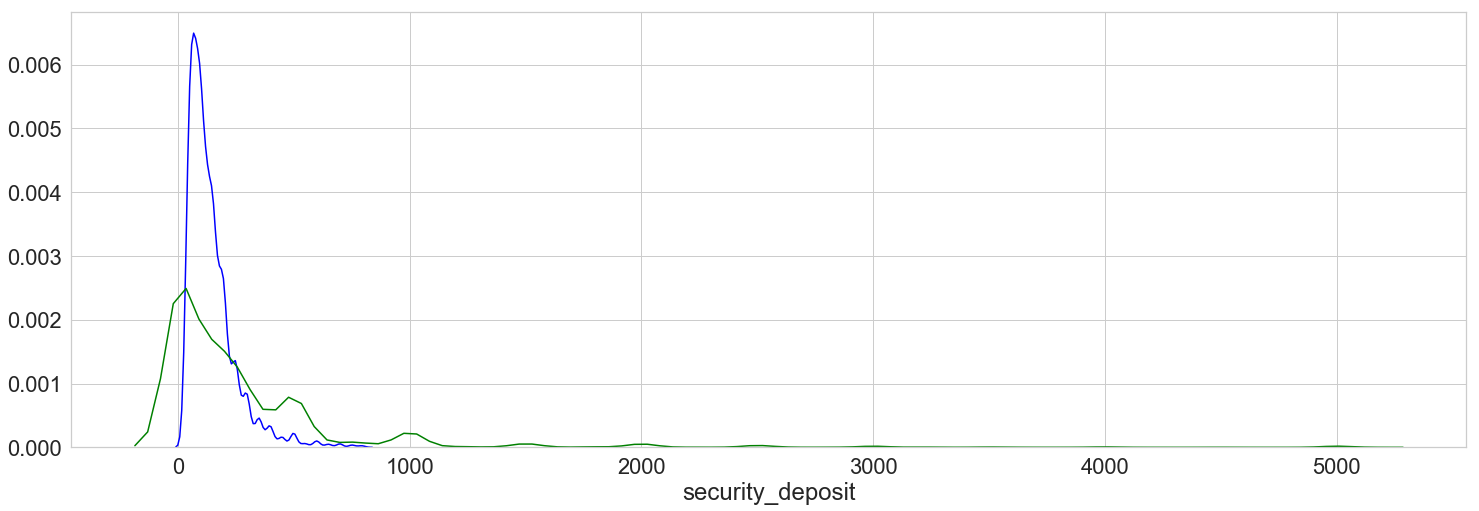

In [31]:
f, ax = plt.subplots(1, 1, figsize=(25, 8))
sns.distplot(tmp["price"], ax=ax, hist=False, kde=True, color="blue")
sns.distplot(tmp["security_deposit"], ax=ax, hist=False, kde=True, color="green")

Definitely have to fill with median. Nothing else can really help over here.

# Cleaning Fee

In [32]:
listings['cleaning_fee'] = listings['cleaning_fee'].str.strip('$').str.replace(',', '').astype('float')

In [33]:
tmp = listings[["price", "cleaning_fee"]]
tmp = tmp.dropna()
tmp.corr()

,price,cleaning_fee
price,1.000000,0.554281
cleaning_fee,0.554281,1.000000


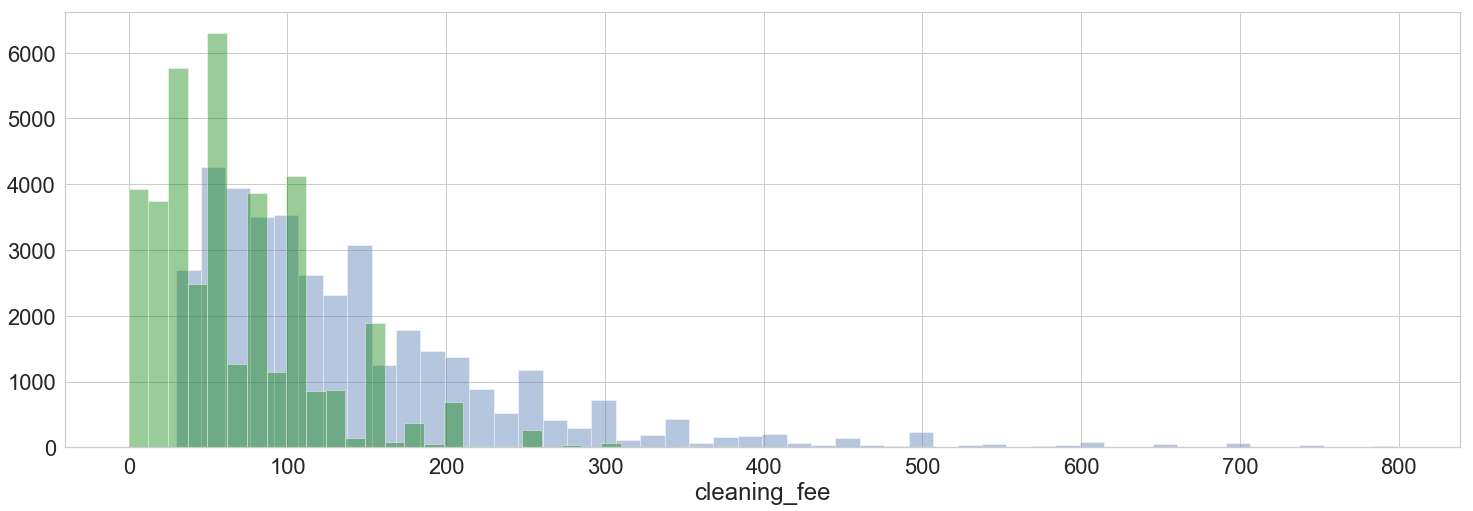

In [34]:
f, ax = plt.subplots(1, 1, figsize=(25, 8))
sns.distplot(tmp["price"], ax=ax, hist=True, kde=False)
sns.distplot(tmp["cleaning_fee"], ax=ax, hist=True, kde=False, color="green")

Definitely have to fill with median. Nothing else can really help over here.

# Neighbourhood Group

In [35]:
listings["neighbourhood_group_cleansed"].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

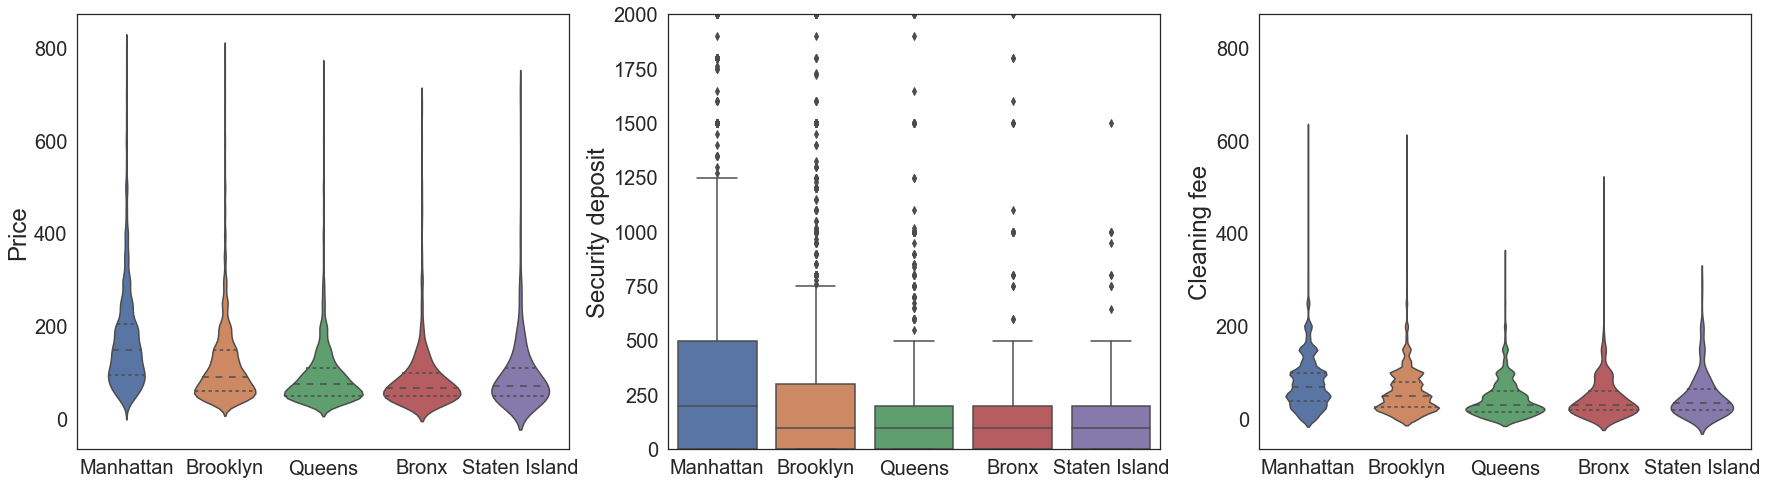

In [36]:
sns.set_style("white")

f, ax = plt.subplots(1,3,figsize=(30, 8))
g = sns.violinplot(x="neighbourhood_group_cleansed", y="price", data=listings, ax=ax[0], inner="quartile")
# t = g.set_title("Price vs.Neighbourhood Group")
t = g.set_ylabel("Price")
t = g.set_xlabel("")
t = g.tick_params(labelsize=20)
matching_ylim = g.get_ylim()

g = sns.boxplot(x="neighbourhood_group_cleansed", y="security_deposit", data=listings, ax=ax[1])
t = g.set_title("")
t = g.set_ylim([0, 2000])
t = g.set_xlabel("")
t = g.set_ylabel("Security deposit")
t = g.tick_params(labelsize=20)

g = sns.violinplot(x="neighbourhood_group_cleansed", y="cleaning_fee", data=listings, ax=ax[2], inner="quartile")
t = g.set_title("")
t = g.set_ylim(matching_ylim)
t = g.set_xlabel("")
t = g.set_ylabel("Cleaning fee")
t = g.tick_params(labelsize=20)


# Property Type and Bedrooms

Club the lower frequency elements together

In [37]:
strings = ("Apartment", "House", "Townhouse", "Loft", "Condominium", "Serviced apartment")
apartment_list = list([])
for line in listings['property_type']:
    if any(s in line for s in strings):
        apartment_list.append('yes')
    else:
        apartment_list.append('no')

listings['prop'] = apartment_list
listings.loc[listings['prop'] == 'no', 'property_type'] = 'Other'
listings.loc[listings['property_type'] == 'Houseboat', 'property_type'] = 'Other'
listings.drop(['prop'], axis=1, inplace=True)

In [38]:
listings["property_type"].value_counts()

Apartment             39503
House                  3603
Townhouse              1557
Loft                   1447
Condominium            1370
Other                  1066
Serviced apartment      705
Name: property_type, dtype: int64

Group all bedrooms 10 and above into one category 10+

In [39]:
def group_bedrooms(row):
    if row < 10:
        return str(int(row))
    elif row >= 10:
        return "10+"
    else:
        return row
    
listings["bedroom_group"] = listings["bedrooms"].apply(group_bedrooms)
# listings[["bedrooms", "bedroom_group"]]

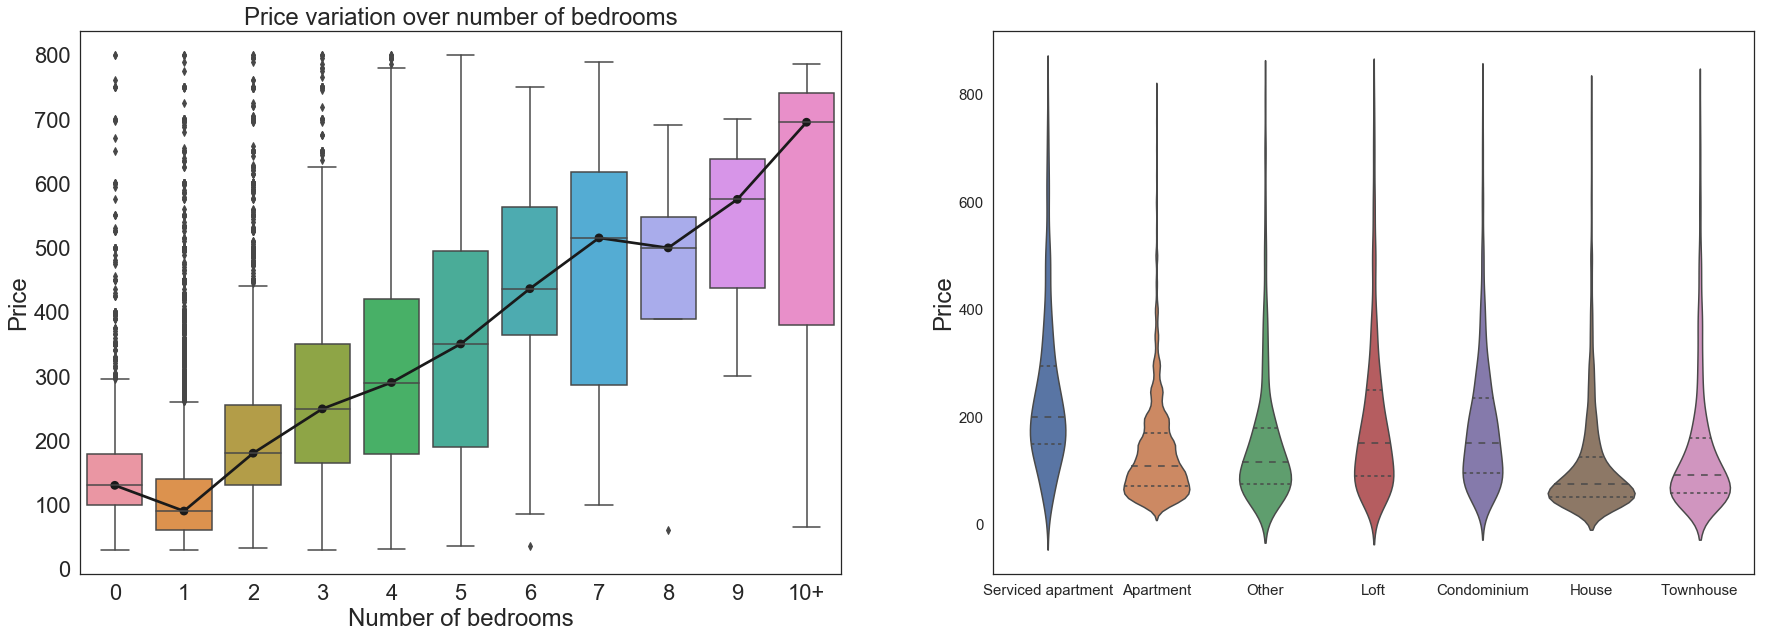

In [40]:
f, ax = plt.subplots(1,2,figsize=(30, 10))
# plot_box(x="bedroom_group", y="price", data=listings, agg_rule="median", ax=ax[0], title="price vs Bedrooms")

listings['bedroom_group'] = pd.Categorical(
    listings['bedroom_group'], 
    categories=['0','1','2','3','4','5','6', '7', '8', '9', '10+'], 
    ordered=True
)
listings.sort_values(by="bedroom_group", inplace=True)

g = sns.boxplot(x="bedroom_group", y="price", data=listings, ax=ax[0])

agg_data = listings[["price", "bedroom_group"]].groupby(by=["bedroom_group"], as_index=False).median()
g = sns.pointplot(x="bedroom_group", y="price", data=agg_data, ax=ax[0], color="k")
t = g.set(title="Price variation over number of bedrooms", xlabel="Number of bedrooms", ylabel="Price")

g = sns.violinplot(x="property_type", y="price", data=listings, ax=ax[1], inner="quartile")
ty = g.set(title="")
t = g.set_ylabel("Price")
t = g.set_xlabel("")
t = g.tick_params(labelsize=15)


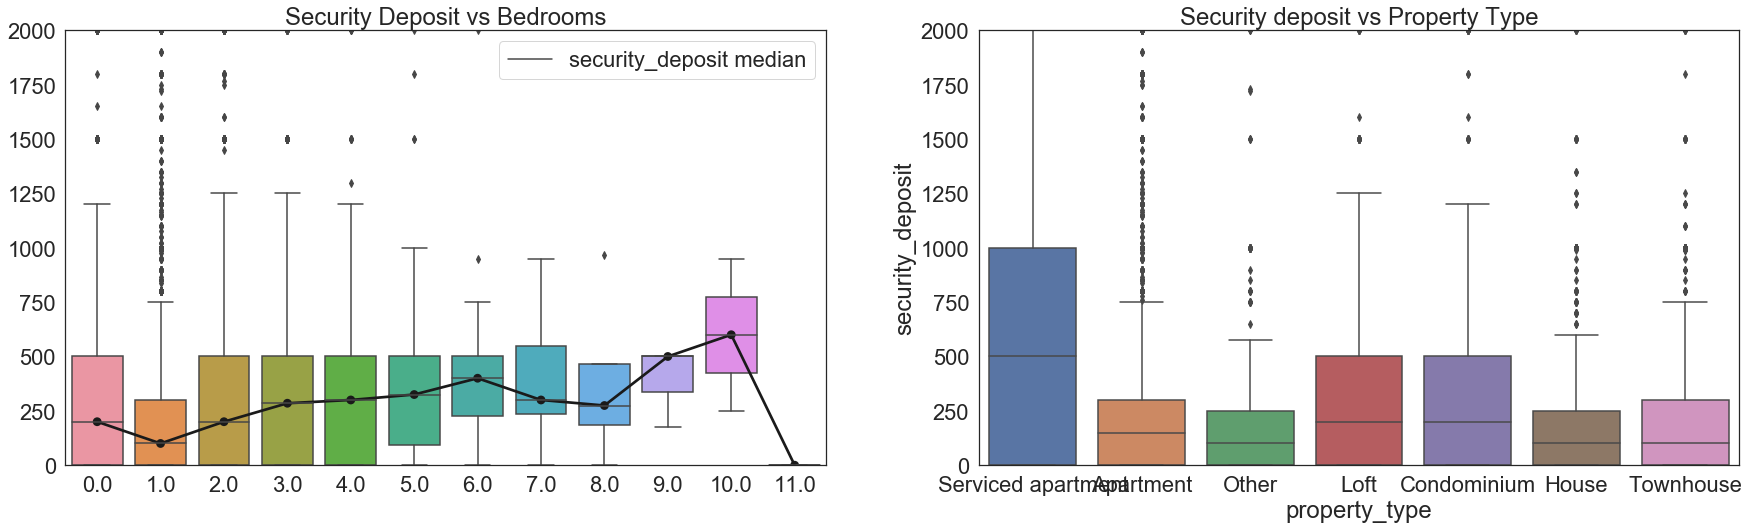

In [56]:
f, ax = plt.subplots(1,2,figsize=(30, 8))
plot_box(x="bedrooms", y="security_deposit", data=listings, agg_rule="median", ax=ax[0], ylim=2000, title="Security Deposit vs Bedrooms")
g = sns.boxplot(x="property_type", y="security_deposit", data=listings, ax=ax[1])
g.set(title="Security deposit vs Property Type")
yl = g.set_ylim(0,2000)

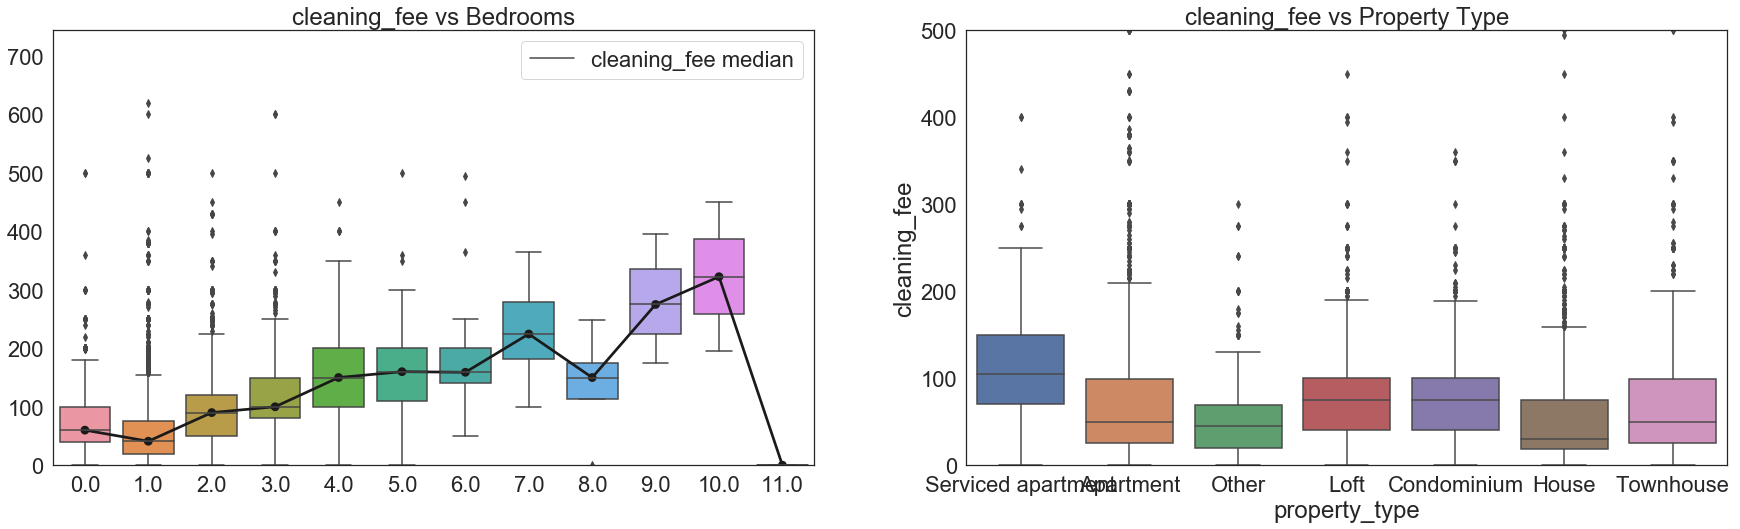

In [42]:
f, ax = plt.subplots(1,2,figsize=(30, 8))
plot_box(x="bedrooms", y="cleaning_fee", data=listings, agg_rule="median", ax=ax[0], title="cleaning_fee vs Bedrooms")
g = sns.boxplot(x="property_type", y="cleaning_fee", data=listings, ax=ax[1])
g.set(title="cleaning_fee vs Property Type")
yl = g.set_ylim(0,500)

How do amenities behave for each property type?

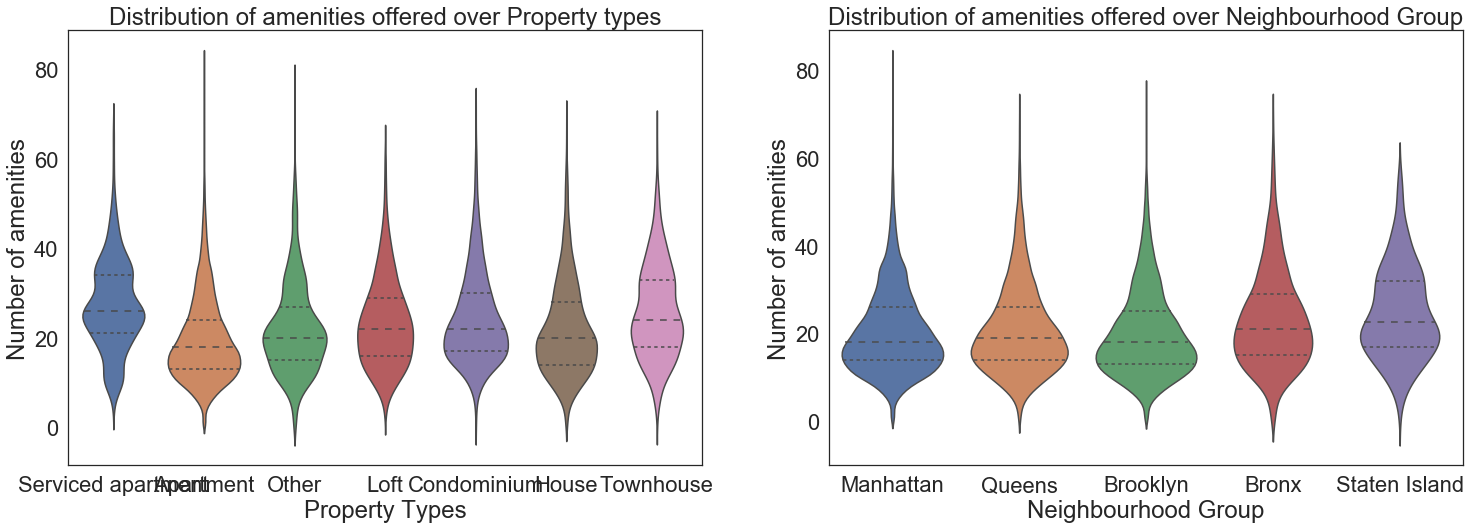

In [43]:
# listings[["num_amenities", "property_type"]].head()
f, ax = plt.subplots(1, 2, figsize=(25, 8))
g = sns.violinplot(x="property_type", y="num_amenities", data=listings, ax=ax[0], inner="quartile")
t = g.set(title="Distribution of amenities offered over Property types", xlabel="Property Types", ylabel="Number of amenities")
g = sns.violinplot(x="neighbourhood_group_cleansed", y="num_amenities", data=listings, ax=ax[1], inner="quartile")
t = g.set(title="Distribution of amenities offered over Neighbourhood Group", xlabel="Neighbourhood Group", ylabel="Number of amenities")

# Super Hosts 

In [44]:
shost_subset = listings[["host_is_superhost", "neighbourhood_group_cleansed", "price", "id"]]

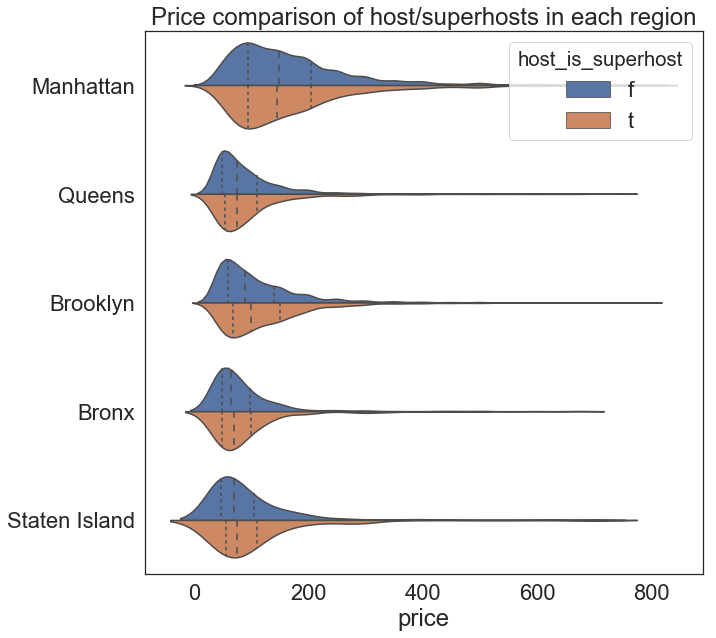

In [45]:
import seaborn as sns
# sns.set(style="whitegrid")
f, ax = plt.subplots(1,1,figsize=(10, 10))
# g = sns.boxplot(y="neighbourhood_group_cleansed", x="price", data=shost_subset, hue="host_is_superhost", ax=ax, split=True)
g = sns.violinplot(y="neighbourhood_group_cleansed", x="price", data=shost_subset, hue="host_is_superhost", ax=ax , split=True, inner="quartile")
t = g.set(title="Price comparison of host/superhosts in each region", ylabel="")

110.0

105.0

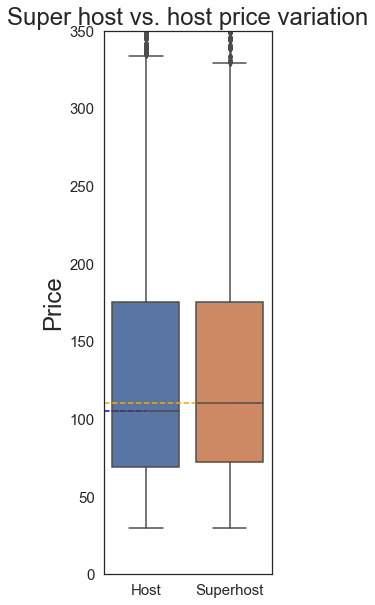

In [62]:
f, ax = plt.subplots(1, 1, figsize=(3, 10))
shost_subset["dummy"] = 1
g = sns.boxplot(x="host_is_superhost", y="price", data=shost_subset, ax=ax)
yl = g.set(ylim=[0, 350], title="Super host vs. host price variation", xlabel="", ylabel="Price")
g.set_xticklabels(["Host", "Superhost"])
t = g.tick_params(labelsize=15)
shost_median = shost_subset[shost_subset["host_is_superhost"]=="t"]["price"].median()
host_median = shost_subset[shost_subset["host_is_superhost"]=="f"]["price"].median()
l = plt.axhline(y=shost_median, xmax=0.75, color="orange", linestyle="--")
l = plt.axhline(y=host_median, xmax=0.25, color="blue", linestyle="--")
display(shost_median, host_median)

## Reviews Per month 

How many listings have reviews and how many do not?

In [71]:
nan_df = analyse_nans(listings[["reviews_per_month"]])
nan_df.head()

,reviews_per_month
total,9933
percentage,20.2
idx_list,"[37563, 21942, 46229, 21527, 39753, 6802, 2230..."


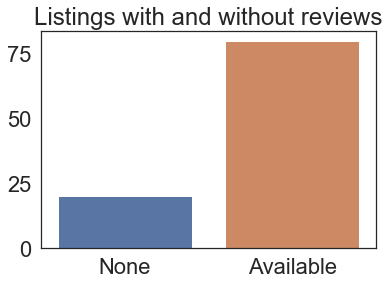

In [85]:
num_nans= nan_df.iloc[1,:].values[0]
num_revs = 100 - num_nans
x = ['None', 'Available']
y = [num_nans, num_revs]
g = sns.barplot(x=x, y=y)
t = g.set(title="Listings with and without reviews")